In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data=loadmat(r"C:\Users\Eduardo\Documents\CARRERA\Udemy\Machine_learning_stanford\datasets\ex7faces.mat")
X=data["X"]
X.shape # 5 examples consisting of 1024 features, (a 32x32 matrix colapse into a 1x1024 vector)

(5000, 1024)

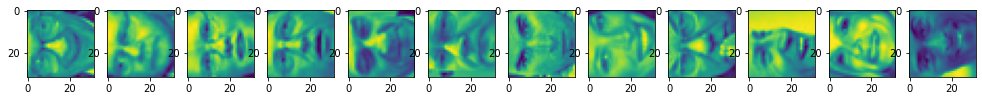

In [3]:
# Visualazation of data
A= X[0,:].reshape(32,32)
B= X[1,:].reshape(32,32)
C= X[2,:].reshape(32,32)
D= X[3,:].reshape(32,32)
E= X[4,:].reshape(32,32)
F= X[5,:].reshape(32,32)
G= X[6,:].reshape(32,32)
H= X[7,:].reshape(32,32)
I= X[8,:].reshape(32,32)
J= X[9,:].reshape(32,32)
K= X[10,:].reshape(32,32)
L= X[11,:].reshape(32,32)

f,(ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11) = plt.subplots(1,12, figsize=(17,12))
ax0.imshow(A)
ax1.imshow(B)
ax2.imshow(C)
ax3.imshow(D)
ax4.imshow(E)
ax5.imshow(F)
ax6.imshow(G)
ax7.imshow(H)
ax8.imshow(I)
ax9.imshow(J)
ax10.imshow(K)
ax11.imshow(L)
plt.show()

In [4]:
# in order to apply  PCA we first have to normalize the date by substracting the mean xj - uj

def covariance_matrix(X):
    m=X.shape[0]
    sigma =(1/m)*X.T.dot(X)
    return sigma

def standarization(data):
    data=data.astype('float64')
    for i in range(0,data.shape[1]): 
        x=data[:,i]
        # calculating mean
        mean=0
        n=len(x)
        for j in range(0,n):
            mean += x[j]
        mean= mean/n

        #calculating standard deviation
        sdv=0
        for j in range(0,n):
            sdv += (x[j]-mean)**2
        sdv=np.sqrt(sdv/n)

        #calculating standarization
        x_stand=np.zeros(n)
        for j in range(0,n):
            data[j,i] =float((data[j,i]-mean)/sdv)
    return data
    

In [5]:
Xnn=standarization(X)

In [6]:
Xnn.shape == X.shape # just to veriffy that the shape

True

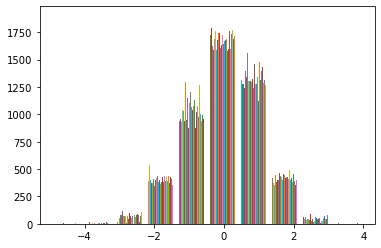

In [7]:
plt.hist(Xnn)
plt.show()

In [8]:
sigma =  covariance_matrix(Xnn)
u, S, v= np.linalg.svd(sigma, full_matrices=True)
u.shape

(1024, 1024)

In [9]:
# decomposition into from 1024 ---> 100 dimensions
K=100
z= np.zeros((X.shape[0],K))
for k in range(0,K):
    for i in range(0,X.shape[0]):
        uk = u[:,k]
        x=Xnn[i,:]
        z[i,k]=x.dot(uk)

In [10]:
Xrec= np.zeros((z.shape[0],u.shape[0]))
K=100
for j in range(0,X.shape[1]):
    for i in range(0,z.shape[0]):
        v = z[i,:]
        uj = u[j,0:100]
        Xrec[i,j]=uj.dot(v)

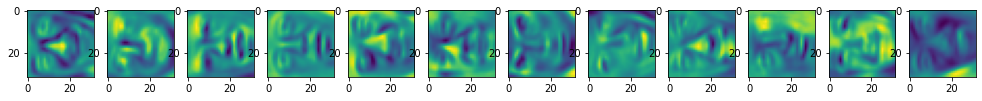

In [11]:
# Visualazation of data recunstructed from the collapsed 100 dimesnional feautres
A= Xrec[0,:].reshape(32,32)
B= Xrec[1,:].reshape(32,32)
C= Xrec[2,:].reshape(32,32)
D= Xrec[3,:].reshape(32,32)
E= Xrec[4,:].reshape(32,32)
F= Xrec[5,:].reshape(32,32)
G= Xrec[6,:].reshape(32,32)
H= Xrec[7,:].reshape(32,32)
I= Xrec[8,:].reshape(32,32)
J= Xrec[9,:].reshape(32,32)
K= Xrec[10,:].reshape(32,32)
L= Xrec[11,:].reshape(32,32)

f,(ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11) = plt.subplots(1,12, figsize=(17,12))
ax0.imshow(A)
ax1.imshow(B)
ax2.imshow(C)
ax3.imshow(D)
ax4.imshow(E)
ax5.imshow(F)
ax6.imshow(G)
ax7.imshow(H)
ax8.imshow(I)
ax9.imshow(J)
ax10.imshow(K)
ax11.imshow(L)
plt.show()

In [35]:
#Second aprroach of evaluation

In [36]:
K=100
a=0
b=0
for i in range(0,K):
    a+=S[i]
for j in range(0,X.shape[1]):
    b+=S[j]
test2=1-(a/b)
test2

0.06806795713540659

In [44]:
print("Variance retained by pca in K=100:",(1-test2)*100,"%")

Variance retained by pca in K=100: 93.19320428645935 %
